# Astro - statistic and cosmology 
## Giacomo Menegatti - 2122852
## Exercise 1: Coin tosses inference
The toin coss is a Bernoulli process with a probaility $p_h$ of giving _head_. The likelihood is given by $L(\bar{x}|p_h)=\Pi_{i=1}^Np(x_i)$ with $x_i$ the outcome, with $p(x=H)=p_h$ and $p(x=T)=1-p_h$, so $L(N_H,N_T|p_h)=p_h^{N_h}(1-p_h)^{N_T}$.

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import bernoulli, norm
np.random.seed(23) #Setting the seed to have consistent results

In [140]:
p_h = 0.3 
x = bernoulli.rvs(p_h, size=1000)

N_h = np.sum(x)
print("Simulating 1000 coin tosses.")
print(f'Obtained {np.sum(x)} heads ({np.sum(x)/10} %) and {1000-np.sum(x)} tails ({100-np.sum(x)/10} %).')

Simulating 1000 coin tosses.
Obtained 297 heads (29.7 %) and 703 tails (70.3 %).


In [141]:
def likelihood(data):
    N_h = np.sum(data)
    N_t = len(data)-N_h
    return lambda p: np.exp(N_h*np.log(p)+ N_t*np.log(1-p)) 

I used as likelihood function $L = \exp[N_h \ln(p_h)+N_t\ln(1-p_h)]$ for better numerical stability.

In [142]:
def posterior(likelihood, prior):
    post = lambda x: likelihood(x)*prior(x)
    area = integrate.quad(func=post, a=0.0, b=1.0, epsabs=1e-12, epsrel=1e-12)[0]
    return lambda x: post(x)/area

The maximum for each posterior is 
 [1.00000000e-04 2.80324224e-01 2.90332232e-01 2.66313013e-01
 2.87329830e-01 2.97337838e-01]


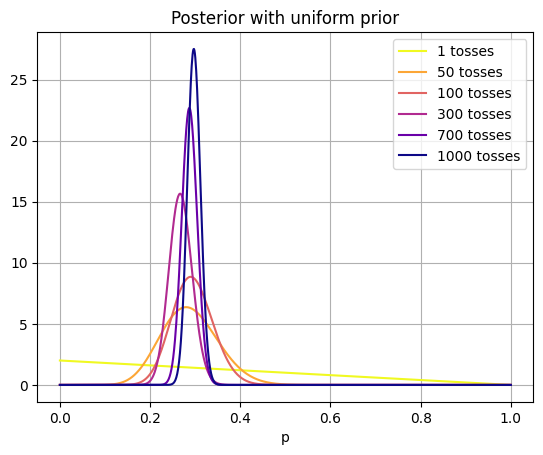

In [143]:
levels = [1,50,100,300,700,1000]
uniform = lambda x: 1.0
posteriors = [posterior(likelihood(x[0:l]), uniform) for l in levels]

cmap = plt.get_cmap('plasma')
p = np.linspace(1e-4,1.0-1e-4,1000)
for l,post,c in zip(levels,posteriors,cmap(np.linspace(1,0,len(levels)))):
    plt.plot(p, post(p), color=c, label=f'{l} tosses')
plt.grid()
plt.legend()
plt.xlabel('p')
plt.title('Posterior with uniform prior')

maxima_uni = np.array([p[np.argmax(post(p))] for post in posteriors])
print(f'The maximum for each posterior is \n {maxima_uni}')

The maximum for each posterior is 
 [0.48048438 0.34837868 0.32836266 0.28132503 0.29333463 0.30134104]


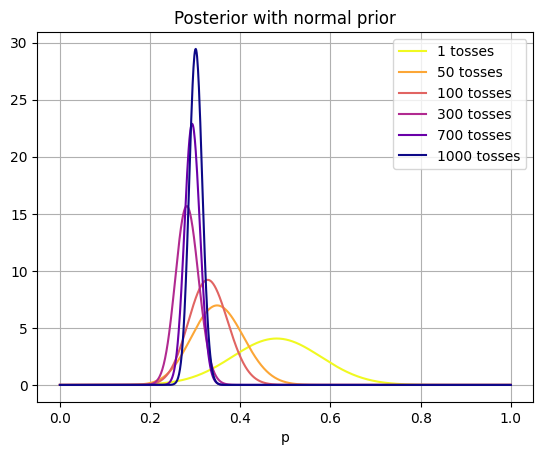

In [144]:
levels = [1,50,100,300,700,1000]
normal = lambda x: norm.pdf(x, loc=0.5, scale=0.1)
posteriors = [posterior(likelihood(x[0:l]), normal) for l in levels]

cmap = plt.get_cmap('plasma')
p = np.linspace(1e-4,1.0-1e-4,1000)
for l,post,c in zip(levels,posteriors,cmap(np.linspace(1,0,len(levels)))):
    plt.plot(p, post(p), color=c, label=f'{l} tosses')
plt.grid()
plt.legend()
plt.xlabel('p')
plt.title('Posterior with normal prior')

maxima_norm = np.array([p[np.argmax(post(p))] for post in posteriors])
print(f'The maximum for each posterior is \n {maxima_norm}')

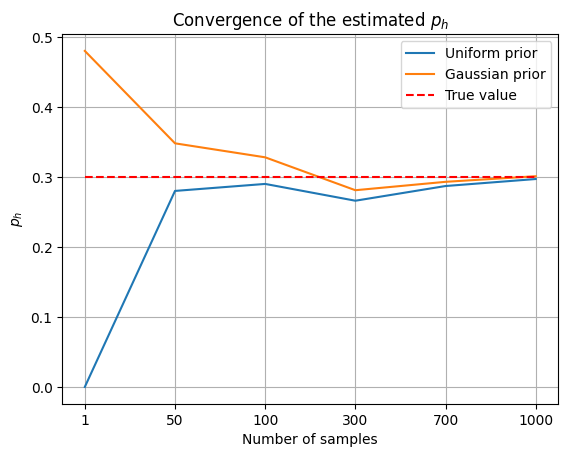

In [145]:
str_levels = [str(l) for l in levels]
plt.plot(str_levels, maxima_uni, label='Uniform prior')
plt.plot(str_levels, maxima_norm, label='Gaussian prior')
plt.hlines(0.3, '1','1000', color='red', linestyle='--', label='True value')
plt.xlabel('Number of samples')
plt.ylabel('$p_h$')
plt.title('Convergence of the estimated $p_h$')
plt.grid()
plt.legend()

By looking at the maximum convergence, it appears that the Gaussian prior gives a faster covergence than the uniform prior for many samples, but for a small number of samples (50,100) it gives a worse result than the other prior, likely because with few samples the posterior are still prior-dominated and the Gaussian prior is not close to the real value, while the unifirm prior follows exactly the likelihood function.

### Exercise 2 - Bayes theorem
Given the statement S, with $p(S)=p(\bar S)=0.5$, the updated degree of belief is $p(S|A)=\frac{p(A|S)p(S)}{p(A|S)p(S)+ p(A|\bar S)p(\bar S)}$. The d.o.b in Mr. A saying the truth is $p(A|S)=p(\bar A |\bar S)=0.8$ ("saying the truth" means that Mr A statement is in accord with the true statement S, i.e. A|S or $\bar A|\bar S$). This gives as the posterior $p(S|A)= 0.8$ (as expected from a uniform prior, the result is given by the likelihood).  
 
The d.o.b in Mr. B lying is $p(B|\bar S)=p(\bar B|S) = 0.75$. This gives $p(S|B)=\frac{p(B|S)p(S)}{p(B|S)p(S)+ p(B|\bar S)p(\bar S)}$ with the updated $p(S)=0.8$ to be $p(S|B)=\frac{4}{7}=0.57$

### Exercise 3 - Bayes theorem for disease test
The events studied are D = "diseased" and T = "tested positive to the disease". The probabilities given are $p(D)=0.01$, $p(\bar T|D)=0.05$, $p(T|\bar D)=0.05$. This gives a true positive $p(T|D)=1-p(\bar T|D)=0.95$ and a true negative $p(\bar T|\bar D) =0.95$. Using Bayes theorem, $p(D|T)=\frac{p(T|D)p(D)}{p(T|D)p(D)+ p(T|\bar D)p(\bar D)}=\frac{0.95\cdot0.01}{0.95\cdot0.01+0.05\cdot0.99}=0.161$